In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import sklearn
import cv2
import matplotlib.pyplot as plt
import os

In [19]:
categories = [
    'healthy',
    'junk',
    'dessert',
    'appetizer',
    'mains',
    'soups',
    'carbs',
    'protein',
    'fats',
    'meat'
]

model = tf.keras.models.load_model("Xception.h5")

In [22]:
from tensorflow.keras.preprocessing.image import img_to_array

imgs_to_show = []
imgs_to_predict = []
DIR = "data\\test"
for img in os.listdir(DIR):
    image = os.path.join(DIR, img)
    image = cv2.imread(image)
    image = cv2.resize(image, (224, 224))
    imgs_to_show.append(image)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    imgs_to_predict.append(image)
imgs_to_predict = np.array(imgs_to_predict, dtype="float") /255.0
# imgs_to_show = np.array(imgs_to_show, dtype="float") /255.0

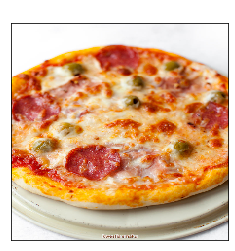

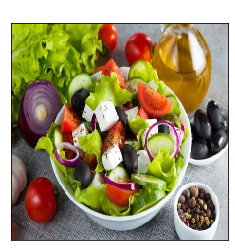

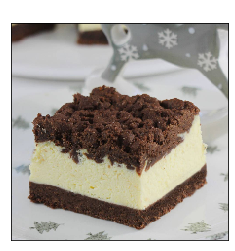

In [23]:
for i in range(len(imgs_to_predict)):
    prediction = np.round(model.predict(imgs_to_predict[i]))
    prediction = prediction[0]
    labels = [categories[j] for j in range(len(prediction)) if prediction[j]==1 ]
    t = plt.title(labels)
    plt.setp(t, color='w')
    img = cv2.cvtColor(imgs_to_show[i], cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.show()
